<a href="https://colab.research.google.com/github/animalran/csvfiles/blob/master/Lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from statistics import stdev 
from statistics import variance
from scipy import stats
from math import sqrt
!pip install yfinance
from pandas import read_csv
import statsmodels
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from matplotlib import pyplot as plt
import yfinance as yf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=187b97ac88f1b0b2d9d9b6261fd26c0c6bade8296f043a1b2db6fd63bf7ec1bd
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
symbol1 =["HDFCBANK.NS","TCS.NS"]
symbol2 =["SBIN.NS","INFY.NS"]

error ratio1: 0.61285644669717
error ratio2: 0.35658571892154656


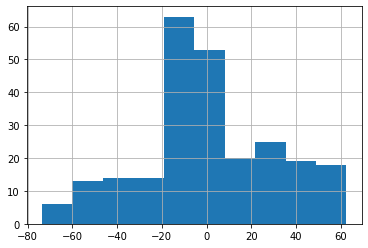

    ystock       xstock  pvalue  std_err   sigma
0  SBIN.NS  HDFCBANK.NS   0.173    0.042  66.581
error ratio1: 0.61285644669717
error ratio2: 0.8222362612800833


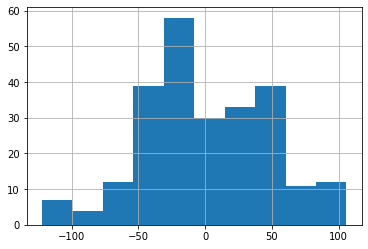

    ystock       xstock  pvalue  std_err   sigma
0  INFY.NS  HDFCBANK.NS   0.154    0.442  47.197
error ratio1: 0.9295095349926039
error ratio2: 0.35658571892154656


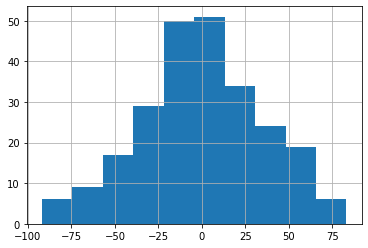

    ystock  xstock  pvalue  std_err   sigma
0  SBIN.NS  TCS.NS   0.021    1.342  93.441
error ratio1: 0.9295095349926039
error ratio2: 0.8222362612800833


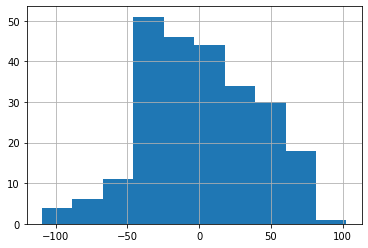

    ystock  xstock  pvalue  std_err   sigma
0  INFY.NS  TCS.NS   0.072   -0.615  99.308


In [37]:
def line(p,q):
    stock1 = yf.Ticker(p)    
    stock2 = yf.Ticker(q)    
    hist1 = stock1.history(period="246d")
    hist2 = stock2.history(period="246d")
    data1=hist1["Close"]
    data2=hist2["Close"]
    x=data1.values.reshape(-1,1)
    y=data2.values.reshape(-1,1)
    reg1=LinearRegression().fit(x,y)# linear regression
    reg2=LinearRegression().fit(y,x)
    intercept1=reg1.intercept_
    intercept2=reg2.intercept_
    #print('Intercept 1:',reg1.intercept_)
    #print('Intercept 2:',reg2.intercept_)
    #print(reg2.intercept_)
    #For retrieving the slope:
    slope1=reg1.coef_
    slope2=reg2.coef_
    #print('Slope 1:',reg1.coef_)
    #print('Slope 2:',reg2.coef_)
    #print(reg2.coef_)
    y_pred = reg1.predict(x)
    x_pred = reg2.predict(y)
    # compair actual output and predicted values
    df1 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
    df2 = pd.DataFrame({'Actual': x.flatten(), 'Predicted': x_pred.flatten()})
    residuals1=y-y_pred
    residuals2=x-x_pred
    res1_1D=residuals1.flatten()
    res2_1D=residuals2.flatten()
    res1=pd.Series(res1_1D)
    res2=pd.Series(res2_1D)
    mx=x.mean()
    my=y.mean()
    sx2 = ((x-mx)**2).sum()
    sy2 = ((y-my)**2).sum()
    er_ratio1 = sqrt(1./len(x) + mx*mx/sx2)
    er_ratio2 = sqrt(1./len(y) + my*my/sy2)
    print('error ratio1:',er_ratio1)
    print('error ratio2:',er_ratio2)
    def res(x,y):
        if (x<y):
            r=res1
            return(r)
        if (x>y):
            r=res2
            return(r)
    r=res(er_ratio1,er_ratio2)
    #if (er_ratio1<er_ratio2):
        #return res1 as r
    #elif():
        #return res2 as r
    #sd_intercept = see * sqrt(1./len(x) + mx*mx/sx2)
    #sd_slope = see * sqrt(1./sx2)
    #see??= std_error
    #type(residuals2)
    sigma=stdev(r)
    si=round(sigma,3)
    std_err=r[244]/sigma
    st_er=round(std_err,3)
    #print(std_err)
    res1.hist()
    plt.show()
    p_value = r.values
    result = adfuller(p_value)
    #print('ADF Statistic: %f' % result[0])
    #print('p-value: %f' % result[1])
    #print('Critical Values:')
    #for key, value in result[4].items():
	    #print('\t%s: %.3f' % (key, value))
    result[1]
    pv= round(result[1],3)
    sheet=[[q,p,pv,st_er,si]]
    df = pd.DataFrame(sheet, columns = ['ystock','xstock','pvalue','std_err','sigma'])
    print(df)
for a in symbol1:
  for b in symbol2:
      asdf=line(a,b)
      asdf
    